# Liver Cirrhosis

### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading Dataset

In [2]:
df = pd.read_csv("cirrhosis.csv")
df.set_index('ID')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## The Data

The dataset consists of following columns :

**ID** : unique identifier [id]

**N_Days**: number of [days] between registration and the earlier of death, transplantation, or study analysis time in July 1986

**Status**: status of the patient [C, CL, or D] C (censored), CL (censored due to liver tx), or D (death)

**Drug**: type of drug [D-penicillamine or placebo]

**Age**: age in [days]

**Sex**: [M or F] M (male) or F (female)

**Ascites**: presence of ascites [N or Y] N (No) or Y (Yes)

**Hepatomegaly**: presence of hepatomegaly [N or Y] N (No) or Y (Yes)

**Spiders**: presence of spiders [N or Y] N (No) or Y (Yes)

**Edema**: presence of edema [N, S, or Y] N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

**Bilirubin**: serum bilirubin in [mg/dl]

**Cholestrol**: serum cholesterol in [mg/dl]

**Albumin**: albumin in [gm/dl]

**Copper**: urine copper in [ug/day]

**Alk_Phos**: alkaline phosphatase in [U/liter]

**SGOT**: SGOT in [U/ml]

**Triglicerides**: triglicerides in [mg/dl]

**Platelets**: platelets per cubic [ml/1000]

**Prothrombin**: prothrombin time in seconds [s]

**Stage**: histologic stage of disease [1, 2, 3, or 4]

### Data Description


In [3]:
df.shape


(418, 20)

In [4]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
df.describe().T.style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
ID,418.000000,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000


### Null Values

In [7]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [8]:
for column in df.columns:
    if df[column].dtype=='object':
        print(column,": ",df[column].unique())

Status :  ['D' 'C' 'CL']
Drug :  ['D-penicillamine' 'Placebo' nan]
Sex :  ['F' 'M']
Ascites :  ['Y' 'N' nan]
Hepatomegaly :  ['Y' 'N' nan]
Spiders :  ['Y' 'N' nan]
Edema :  ['Y' 'N' 'S']


In [9]:
df['Stage'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [10]:
df['Stage'].fillna(df['Stage'].mode()[0],inplace=True)

In [11]:
df.groupby('Stage').size()

Stage
1.0     21
2.0     92
3.0    161
4.0    144
dtype: int64

In [12]:
label_list = ['Drug','Sex','Ascites','Hepatomegaly','Spiders']
for col in label_list:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [13]:
for column in df.columns:
    if df[column].dtype=='object':
        print(column,": ",df[column].unique())

Status :  ['D' 'C' 'CL']
Drug :  ['D-penicillamine' 'Placebo']
Sex :  ['F' 'M']
Ascites :  ['Y' 'N']
Hepatomegaly :  ['Y' 'N']
Spiders :  ['Y' 'N']
Edema :  ['Y' 'N' 'S']


### Label Encoding and One-Hot Encoding

In [14]:
from sklearn import preprocessing

In [15]:
le = preprocessing.LabelEncoder()

df[label_list] = df[label_list].apply(le.fit_transform)

# df[label_list].unique()

In [16]:
for column in label_list:
#     if df[column].dtype=='object':
        print(column,": ",df[column].unique())

Drug :  [0 1]
Sex :  [0 1]
Ascites :  [1 0]
Hepatomegaly :  [1 0]
Spiders :  [1 0]


In [17]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,0,21464,0,1,1,1,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,0,20617,0,0,1,1,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,0,25594,1,0,0,0,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,0,19994,0,0,1,1,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,1,13918,0,0,1,1,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [18]:
dummies = [col for col in df.columns if df[col].dtype=='object'and col not in label_list]

dummies

['Status', 'Edema']

In [19]:
cir = pd.get_dummies(df,columns=dummies,prefix=dummies)
cir.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Edema_N,Edema_S,Edema_Y
0,1,400,0,21464,0,1,1,1,14.5,261.0,...,172.0,190.0,12.2,4.0,0,0,1,0,0,1
1,2,4500,0,20617,0,0,1,1,1.1,302.0,...,88.0,221.0,10.6,3.0,1,0,0,1,0,0
2,3,1012,0,25594,1,0,0,0,1.4,176.0,...,55.0,151.0,12.0,4.0,0,0,1,0,1,0
3,4,1925,0,19994,0,0,1,1,1.8,244.0,...,92.0,183.0,10.3,4.0,0,0,1,0,1,0
4,5,1504,1,13918,0,0,1,1,3.4,279.0,...,72.0,136.0,10.9,3.0,0,1,0,1,0,0


### Visualization

Stage
1.0     21
2.0     92
3.0    161
4.0    144
dtype: int64


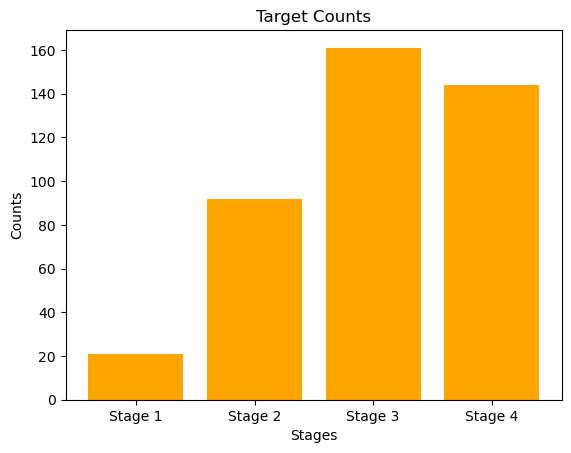

In [20]:
counts = cir.groupby('Stage').size()
print(counts)
plt.bar(x = counts.index, height = counts, color = 'orange')
plt.xticks(rotation = 90)
plt.title('Target Counts')
plt.xlabel('Stages')
plt.ylabel('Counts')
plt.xticks([1,2,3,4], ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], rotation = 0)
plt.show()

In [21]:
df['Stage']=df['Stage'].astype('int64')

**Summary**: We can see that the target value is unbalanced. For this we will later use SMOTE method for making a proper balanced fitting and learning.


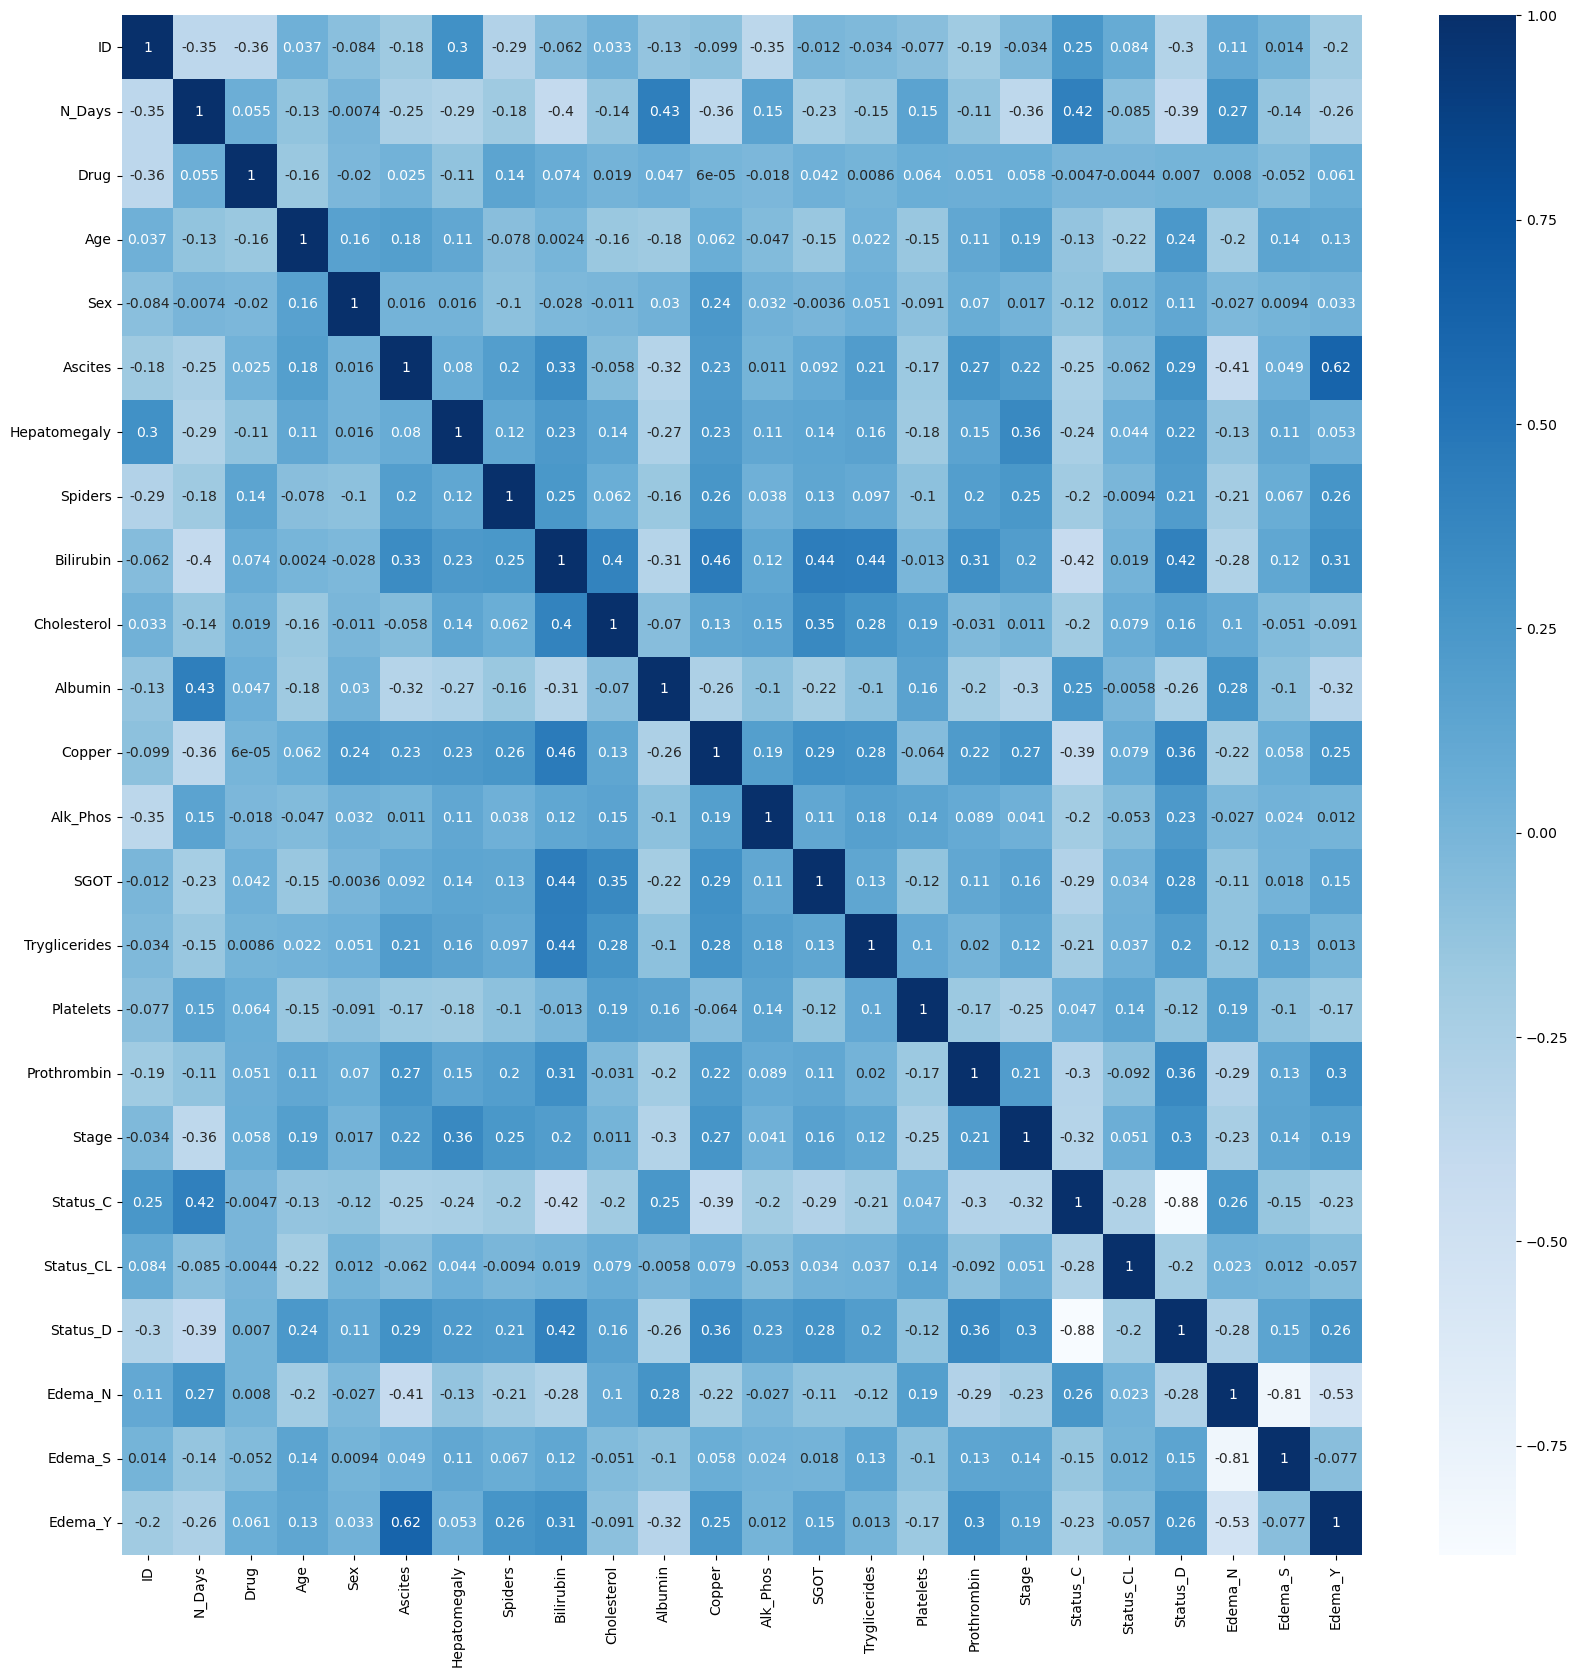

In [22]:
corr = cir.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

In [23]:
corr

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Edema_N,Edema_S,Edema_Y
ID,1.000000,-0.354305,-0.357086,0.037136,-0.083855,-0.182124,0.299714,-0.289600,-0.062154,0.032897,...,-0.034100,-0.076699,-0.191930,-0.033911,0.251297,0.083650,-0.297392,0.106538,0.013631,-0.199337
N_Days,-0.354305,1.000000,0.054742,-0.125934,-0.007386,-0.247090,-0.287832,-0.180715,-0.403953,-0.138236,...,-0.153000,0.151361,-0.111470,-0.362013,0.420448,-0.084941,-0.387981,0.271732,-0.135174,-0.264077
Drug,-0.357086,0.054742,1.000000,-0.158028,-0.019563,0.024685,-0.113408,0.142884,0.074236,0.019148,...,0.008572,0.064304,0.051275,0.058495,-0.004727,-0.004403,0.006973,0.007974,-0.051883,0.061147
Age,0.037136,-0.125934,-0.158028,1.000000,0.163341,0.183588,0.111522,-0.078040,0.002362,-0.157620,...,0.022065,-0.148201,0.113760,0.187852,-0.131777,-0.218702,0.241145,-0.199729,0.143887,0.130074
Sex,-0.083855,-0.007386,-0.019563,0.163341,1.000000,0.015873,0.016205,-0.103809,-0.027652,-0.011421,...,0.050511,-0.090594,0.070476,0.017356,-0.116407,0.012111,0.112976,-0.027345,0.009358,0.032678
Ascites,-0.182124,-0.247090,0.024685,0.183588,0.015873,1.000000,0.079680,0.195960,0.334283,-0.057983,...,0.207103,-0.167873,0.268039,0.216645,-0.254949,-0.062249,0.290693,-0.409107,0.049382,0.619193
Hepatomegaly,0.299714,-0.287832,-0.113408,0.111522,0.016205,0.079680,1.000000,0.117692,0.234372,0.137713,...,0.160466,-0.183202,0.147804,0.356155,-0.236534,0.043851,0.220186,-0.128065,0.113436,0.052955
Spiders,-0.289600,-0.180715,0.142884,-0.078040,-0.103809,0.195960,0.117692,1.000000,0.247932,0.062389,...,0.096665,-0.103464,0.196424,0.245199,-0.198537,-0.009395,0.207329,-0.213679,0.066877,0.264335
Bilirubin,-0.062154,-0.403953,0.074236,0.002362,-0.027652,0.334283,0.234372,0.247932,1.000000,0.397129,...,0.436748,-0.013435,0.314894,0.200314,-0.417319,0.019204,0.416818,-0.282617,0.117552,0.307779
Cholesterol,0.032897,-0.138236,0.019148,-0.157620,-0.011421,-0.057983,0.137713,0.062389,0.397129,1.000000,...,0.276830,0.191710,-0.030811,0.011164,-0.199156,0.078634,0.163555,0.101355,-0.051060,-0.091075


In [24]:
corrw = cir.corrwith(cir['Stage']).sort_values(ascending=False)
corrw

Stage            1.000000
Hepatomegaly     0.356155
Status_D         0.298735
Copper           0.269400
Spiders          0.245199
Ascites          0.216645
Prothrombin      0.207263
Bilirubin        0.200314
Age              0.187852
Edema_Y          0.186094
SGOT             0.164945
Edema_S          0.142135
Tryglicerides    0.123899
Drug             0.058495
Status_CL        0.050775
Alk_Phos         0.041273
Sex              0.017356
Cholesterol      0.011164
ID              -0.033911
Edema_N         -0.231441
Platelets       -0.245473
Albumin         -0.302190
Status_C        -0.316754
N_Days          -0.362013
dtype: float64

**Summary**

We can see that some biomarkers that is mostly related to stage of liver cirrhosis are:
   
**1. Hepatomegaly** : an abnormal enlargement of the liver.

**2. Copper** : excessive copper accumulation in the liver can lead to liver damage.

**3. Spiders** : abnormal blood vessel clusters that can appear on the skin's surface in patients with liver disease

**4. Ascites** : accumulation of excessive fluid in the abdominal cavity

**5. Prothrombin**: blood clotting protein produced in the liver

**6. Bilirubin**: orange-yellow pigment that is produced by the breakdown of hemoglobin in red blood cells and is processed by the liver

Status_D is not considered for now as it means the patient has already died. Other than that, the ones with correlation of more than 0.2 are considered. 


In [25]:
grouped = df.groupby(['Sex','Stage']).size()
grouped
grouped.index

MultiIndex([(0, 1),
            (0, 2),
            (0, 3),
            (0, 4),
            (1, 1),
            (1, 2),
            (1, 3),
            (1, 4)],
           names=['Sex', 'Stage'])

<AxesSubplot:xlabel='Sex,Stage'>

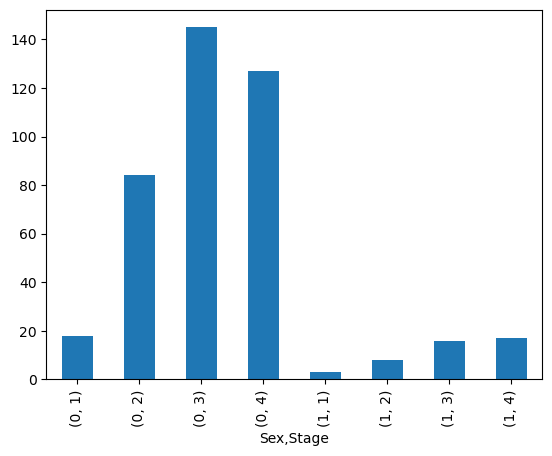

In [26]:
grouped.plot(kind='bar')

**Summary**:

From this bar-graph we can conclude that most of the data that we have shows female are mostly affected by liver cirrhosis compared to male. Also from among the data, the stage that most females are in is Stage3 while for men, it is Stage4.

<AxesSubplot:xlabel='Hepatomegaly,Stage'>

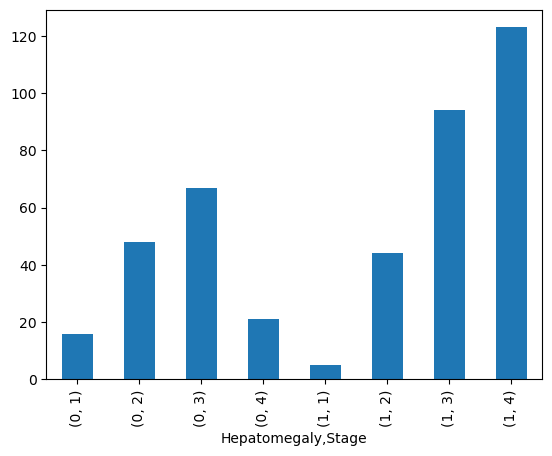

In [27]:
grouped_hepatomegaly = df.groupby(['Hepatomegaly','Stage']).size()
grouped_hepatomegaly.plot(kind='bar')

Abnormally large enlargement is mostly present in Cirrhosis and then at Fibriosis stage. We can conclude that as Hepatomegaly condition is present, stage is ascending towards 4 i.e. Cirrhosis.

Ascites  Stage
0        1         21
         2         90
         3        160
         4        123
1        2          2
         3          1
         4         21
dtype: int64


<AxesSubplot:xlabel='Ascites,Stage'>

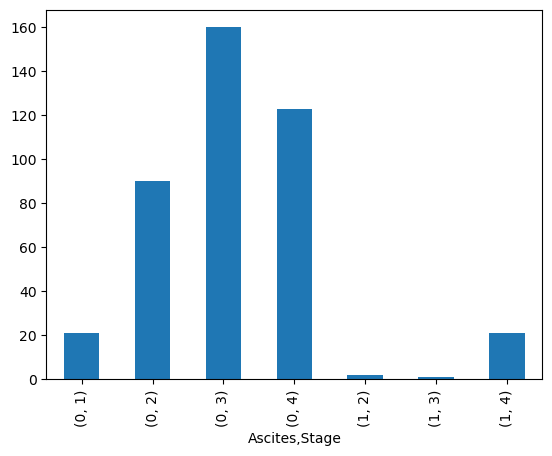

In [28]:
grouped_ascites = df.groupby(['Ascites','Stage']).size()
print(grouped_ascites)
grouped_ascites.plot(kind='bar')

Stage is correlated with Ascites. From above graph, we can conclude that Ascites are mostly present at Cirrhosis stage of liver rather than Fibriosis stage and Ascites is not at all present in Healthy Liver. 

<AxesSubplot:xlabel='Drug,Stage'>

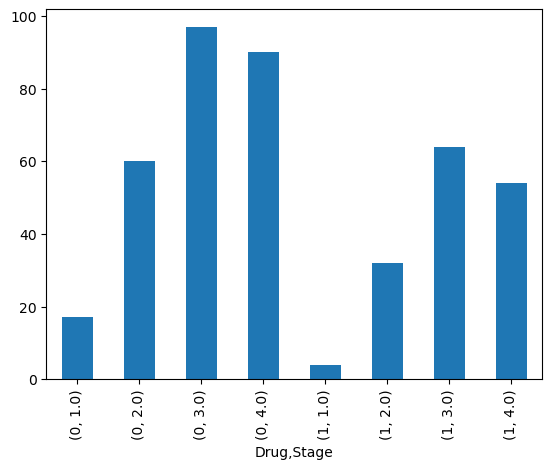

In [29]:
grouped_drug = cir.groupby(['Drug','Stage']).size()
grouped_drug.plot(kind='bar')

<AxesSubplot:xlabel='Status,Stage'>

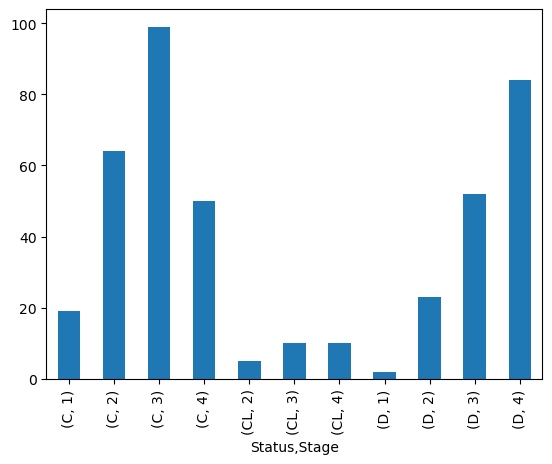

In [30]:
grouped_status = df.groupby(['Status','Stage']).size()
grouped_status.plot(kind='bar')

Considering Correlation and above graph, Status Death is mostly related with target Stage while Censored (with or without liver tx) is not much related.

<AxesSubplot:xlabel='Edema,Stage'>

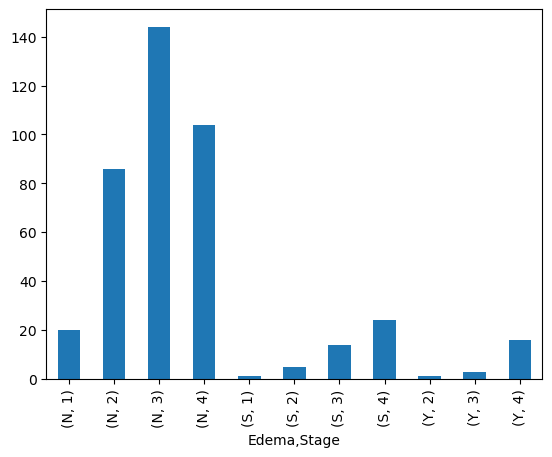

In [31]:
grouped_edema = df.groupby(['Edema','Stage']).size()
grouped_edema.plot(kind='bar')

S suggest that Edema is present and no therapy was given previously OR Edema is cured by therapy. Y means there is Edema despite therapy and N is no edema. We can see that for most patients, edema is not present. It will not be a priority to focus on edema biomarker. 

**Changing Target Variables**
Since Stage1 is Healthy Liver stage and we can easily have Stage1 Liver condition from Stage2, we will merge them. Also, Stage3 is Fibriosis stage and Stage4 is Cirrhosis stage. Stage4 is an irreversible stage and if a patient is in stage3, serious treatment is needed more in this stage as well.

**Stage 1+2 into stage 1, Stage3 to stage2 and stage4 as stage3. We will be having 3 classes.**

In [32]:
df['Stage'] = df['Stage'].apply(lambda x: 1 if x==2 else x)
df['Stage'] = df['Stage'].apply(lambda x: 2 if x==3 else x)
df['Stage'] = df['Stage'].apply(lambda x: 3 if x==4 else x)



In [39]:
df.groupby('Stage').size()


Stage
1    113
2    161
3    144
dtype: int64

<AxesSubplot:xlabel='Stage', ylabel='count'>

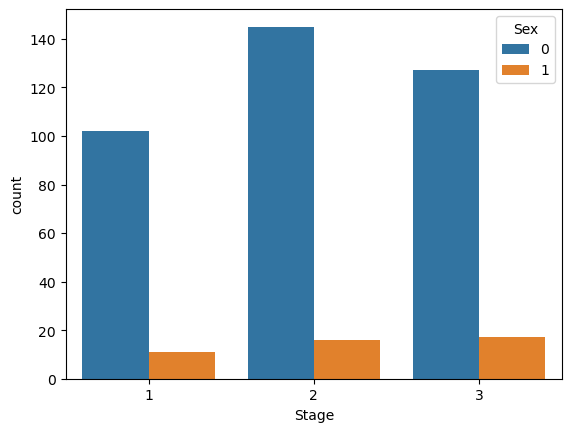

In [40]:
sns.countplot(x='Stage', hue='Sex', data=df)


<AxesSubplot:xlabel='Stage', ylabel='count'>

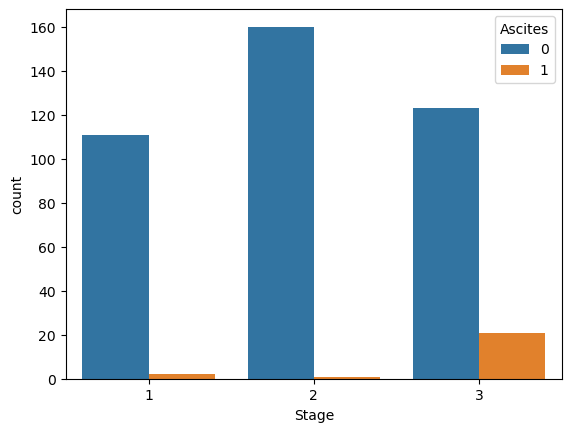

In [41]:
sns.countplot(x='Stage', hue='Ascites', data=df)


<AxesSubplot:xlabel='Stage', ylabel='count'>

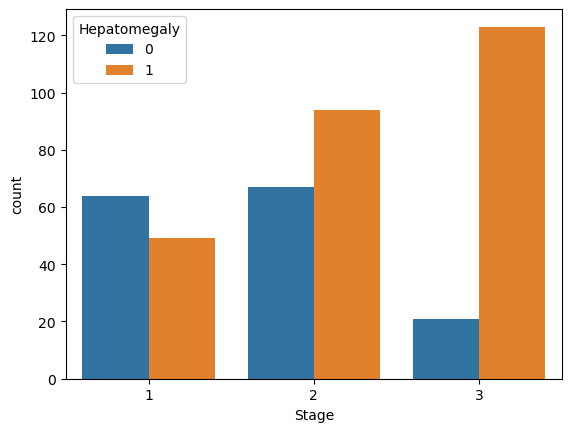

In [42]:
sns.countplot(x='Stage', hue='Hepatomegaly', data=df)


<AxesSubplot:xlabel='Stage', ylabel='count'>

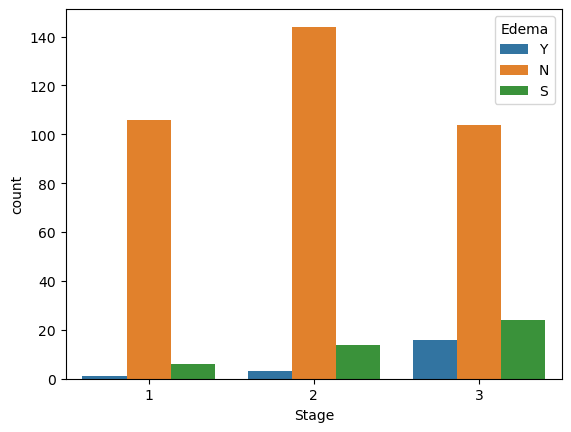

In [43]:
sns.countplot(x='Stage', hue='Edema', data=df)


<AxesSubplot:xlabel='Stage', ylabel='count'>

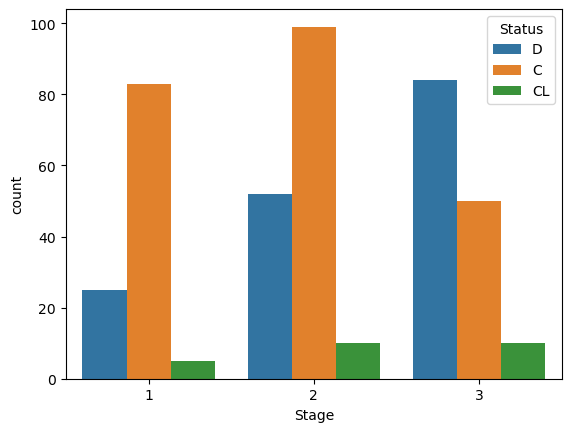

In [44]:
sns.countplot(x='Stage', hue='Status', data=df)


<AxesSubplot:xlabel='Stage', ylabel='count'>

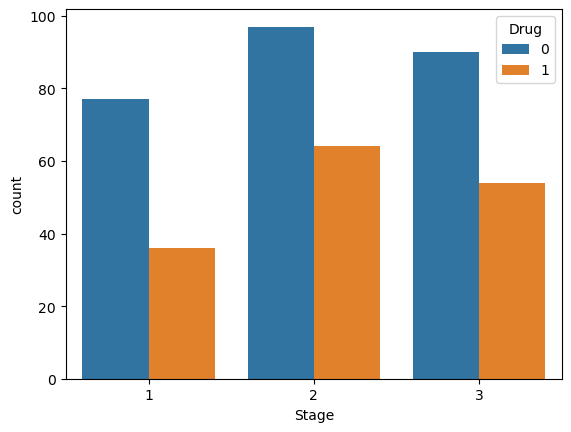

In [45]:
sns.countplot(x='Stage', hue='Drug', data=df)


### Exploring Numerical BioMarkers


In [47]:
df.describe()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,418.000000
mean,209.500000,1917.782297,0.368421,18533.351675,0.105263,0.057416,0.636364,0.215311,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,2.074163
std,120.810458,1104.672992,0.482954,3815.845055,0.307260,0.232915,0.481622,0.411530,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.781533
min,1.000000,41.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,0.000000,15644.500000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,1.000000
50%,209.500000,1730.000000,0.000000,18628.000000,0.000000,0.000000,1.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,2.000000
75%,313.750000,2613.500000,1.000000,21272.500000,0.000000,0.000000,1.000000,0.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,3.000000
max,418.000000,4795.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


**Checking for Outliers**

In [59]:
num_col = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and df[col].nunique()>3 ]
num_col = num_col[3:]
num_col

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

Text(0.5, 1.0, 'Prothrombin')

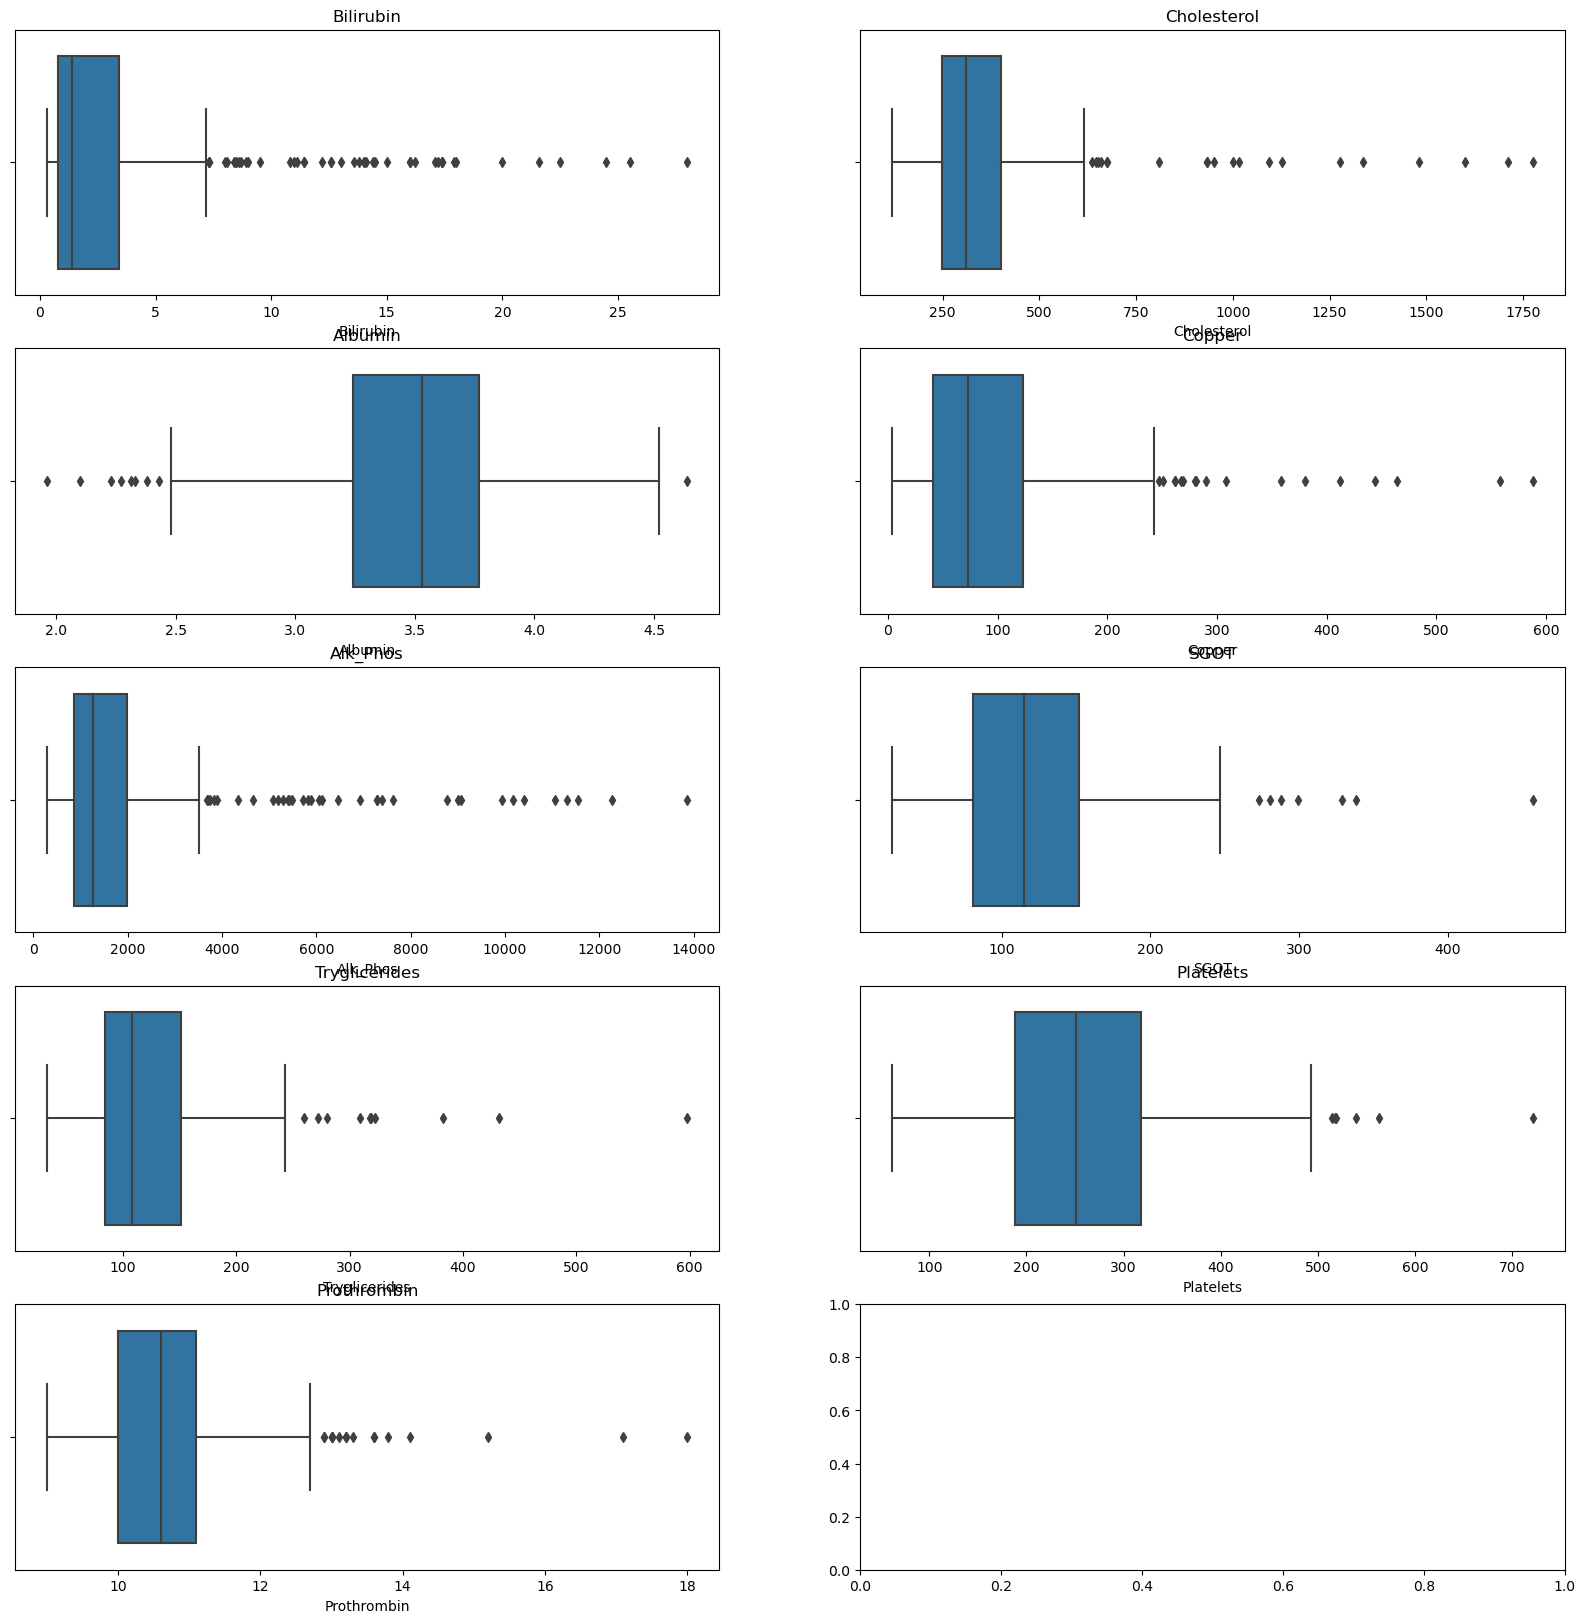

In [75]:
fig, axs = plt.subplots(5,2,figsize=(20,20))



sns.boxplot(x=df[num_col[0]], ax=axs[0, 0], orient='h')
sns.boxplot(x=df[num_col[1]], ax=axs[0, 1], orient='h')
sns.boxplot(x=df[num_col[2]], ax=axs[1, 0], orient='h')
sns.boxplot(x=df[num_col[3]], ax=axs[1, 1], orient='h')
sns.boxplot(x=df[num_col[4]], ax=axs[2, 0], orient='h')
sns.boxplot(x=df[num_col[5]], ax=axs[2, 1], orient='h')
sns.boxplot(x=df[num_col[6]], ax=axs[3, 0], orient='h')
sns.boxplot(x=df[num_col[7]], ax=axs[3, 1], orient='h')
sns.boxplot(x=df[num_col[8]], ax=axs[4, 0], orient='h')
                 

axs[0,0].set_title(num_col[0])
axs[0,1].set_title(num_col[1])
axs[1,0].set_title(num_col[2])
axs[1,1].set_title(num_col[3])
axs[2,0].set_title(num_col[4])
axs[2,1].set_title(num_col[5])
axs[3,0].set_title(num_col[6])
axs[3,1].set_title(num_col[7])
axs[4,0].set_title(num_col[8])
                 
                 

# axs[0,0].boxplot(df[num_col[0]],vert=False)
# axs[0,1].boxplot(df[num_col[1]],vert=False)
# axs[1,0].boxplot(df[num_col[2]],vert=False)
# axs[1,1].boxplot(df[num_col[3]],vert=False)
# axs[2,0].boxplot(df[num_col[4]],vert=False)
# axs[2,1].boxplot(df[num_col[5]],vert=False)
# axs[3,0].boxplot(df[num_col[6]],vert=False)
# axs[3,1].boxplot(df[num_col[7]],vert=False)
# axs[4,0].boxplot(df[num_col[8]],vert=False)



    